In [1]:
#   this jhu data extract is based on the tutorial by B Chen which can be found at the following link
#   https://towardsdatascience.com/covid-19-data-processing-58aaa3663f6 
#   the data extract uses the following jhu csv files:
#   1  time_series_covid19_confirmed_global.csv................confirmed global Covid_19 cases
#   2  time_series_covid19_deaths_global.csv...................confirmed global Covid_19 deaths
#   3  time_series_covid19_recovered_global.csv................confirmed global Covid_19 recovered

#   import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from urllib.error import HTTPError
import numpy as np
import wget
import time
from datetime import datetime


# url of the raw csv dataset
urls = [
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
]
[wget.download(url) for url in urls]



['time_series_covid19_confirmed_global (2).csv',
 'time_series_covid19_deaths_global (2).csv',
 'time_series_covid19_recovered_global (2).csv']

In [2]:
#   create dataframes from csv's

confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
    
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
    
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

confirmed_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1588335,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,467391,467682,467682,467682,467682,468619,469452,469748,469748,469748
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10103,10105,10109,10111,10115,10118,10123,10125,10126,10126
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,221880,225260,228932,231581,233120,234476,238383,243638,249193,254274


In [3]:
deaths_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7341,7346,7348,7349,7354,7354,7355,7356,7356,7356
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3180,3181,3187,3189,3194,3194,3207,3212,3212,3217
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6205,6213,6222,6229,6238,6246,6254,6263,6271,6276
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,138,139,139,139,139,139,140,140,140,140
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1741,1743,1746,1746,1749,1749,1756,1760,1764,1770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,30251,30531,30766,31007,31214,31418,31632,31877,32168,32394
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,4882,4884,4884,4884,4884,4907,4912,4919,4919,4919
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1981,1981,1982,1983,1983,1984,1984,1984,1984,1984
278,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3685,3688,3691,3697,3702,3709,3716,3726,3730,3734


In [4]:
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#   use melt() to unpivot DataFrames from current wide format into long format

dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)
confirmed_df_long

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
198795,NaN,Vietnam,14.058324,108.277199,12/31/21,1731257
198796,NaN,West Bank and Gaza,31.952200,35.233200,12/31/21,469748
198797,NaN,Yemen,15.552727,48.516388,12/31/21,10126
198798,NaN,Zambia,-13.133897,27.849332,12/31/21,254274


In [6]:
deaths_df_long

,Province/State,Country/Region,Lat,Long,Date,Deaths
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
198795,NaN,Vietnam,14.058324,108.277199,12/31/21,32394
198796,NaN,West Bank and Gaza,31.952200,35.233200,12/31/21,4919
198797,NaN,Yemen,15.552727,48.516388,12/31/21,1984
198798,NaN,Zambia,-13.133897,27.849332,12/31/21,3734


In [7]:
recovered_df_long

,Province/State,Country/Region,Lat,Long,Date,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
188145,NaN,Vietnam,14.058324,108.277199,12/31/21,0
188146,NaN,West Bank and Gaza,31.952200,35.233200,12/31/21,0
188147,NaN,Yemen,15.552727,48.516388,12/31/21,0
188148,NaN,Zambia,-13.133897,27.849332,12/31/21,0


In [8]:
#   remove recovered data for Canada due to mismatch issue
#   Canada recovered data is counted by Country-wise rather than Province/State-wise

recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']


In [9]:
#    merge confirmed_df_long and deaths_df_long

full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
#    merge full_table and recovered_df_long

full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Province/State', 'Country/Region', 'Date', 'Lat', 'Long']
)
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0,0,0.0
1,NaN,Albania,41.153300,20.168300,1/22/20,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0,0,0.0
...,...,...,...,...,...,...,...,...
198795,NaN,Vietnam,14.058324,108.277199,12/31/21,1731257,32394,0.0
198796,NaN,West Bank and Gaza,31.952200,35.233200,12/31/21,469748,4919,0.0
198797,NaN,Yemen,15.552727,48.516388,12/31/21,10126,1984,0.0
198798,NaN,Zambia,-13.133897,27.849332,12/31/21,254274,3734,0.0


In [10]:
#   data cleansing
#   1 converting date from string to datetime
#   2 replacing missing value NaN
#   3 coronavirus cases reported from 3 cruise ships should be treated differently

#   1 converting date from string to datetime
full_table['Date'] = pd.to_datetime(full_table['Date'])


In [11]:
full_table

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0
...,...,...,...,...,...,...,...,...
198795,NaN,Vietnam,14.058324,108.277199,2021-12-31,1731257,32394,0.0
198796,NaN,West Bank and Gaza,31.952200,35.233200,2021-12-31,469748,4919,0.0
198797,NaN,Yemen,15.552727,48.516388,2021-12-31,10126,1984,0.0
198798,NaN,Zambia,-13.133897,27.849332,2021-12-31,254274,3734,0.0


In [12]:
#   2 replacing missing values NaN
#   detect missing values NaN 

full_table.isna().sum()

Province/State    137030
Country/Region         0
Lat                 1420
Long                1420
Date                   0
Confirmed              0
Deaths                 0
Recovered          14910
dtype: int64

In [13]:
#   replace 'recovered' Nans with zero

full_table['Recovered'] = full_table['Recovered'].fillna(0)
full_table['Recovered']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
198795    0.0
198796    0.0
198797    0.0
198798    0.0
198799    0.0
Name: Recovered, Length: 198800, dtype: float64

In [14]:
#   3 coronavirus cases reported from 3 cruise ships should be treated differently
#   cases reported from cruise ships: Grand Princess, Diamond Princess and MS Zaandam need to be extracted and
#   treated differently due to Province/State and Country/Region mismatch over time

#   extract data for these ships 
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')
full_ship = full_table[ship_rows]

#   remove data for these ships 
full_table = full_table[~(ship_rows)]

In [15]:
#    calculate active cases = confirmed - deaths - recovered

full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
full_table

C:\Users\mikem\AppData\Local\Temp/ipykernel_9540/2677385167.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0.0,0.0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0.0,0.0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0.0,0.0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0.0,0.0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
198795,NaN,Vietnam,14.058324,108.277199,2021-12-31,1731257,32394,0.0,1698863.0
198796,NaN,West Bank and Gaza,31.952200,35.233200,2021-12-31,469748,4919,0.0,464829.0
198797,NaN,Yemen,15.552727,48.516388,2021-12-31,10126,1984,0.0,8142.0
198798,NaN,Zambia,-13.133897,27.849332,2021-12-31,254274,3734,0.0,250540.0


In [16]:
#   aggregate data into Country/Region and group by Date and Country/Region

full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
full_grouped

C:\Users\mikem\AppData\Local\Temp/ipykernel_9540/2747540925.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  full_grouped = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()


,Date,Country/Region,Confirmed,Deaths,Recovered,Active
0,2020-01-22,Afghanistan,0,0,0.0,0.0
1,2020-01-22,Albania,0,0,0.0,0.0
2,2020-01-22,Algeria,0,0,0.0,0.0
3,2020-01-22,Andorra,0,0,0.0,0.0
4,2020-01-22,Angola,0,0,0.0,0.0
...,...,...,...,...,...,...
137735,2021-12-31,Vietnam,1731257,32394,0.0,1698863.0
137736,2021-12-31,West Bank and Gaza,469748,4919,0.0,464829.0
137737,2021-12-31,Yemen,10126,1984,0.0,8142.0
137738,2021-12-31,Zambia,254274,3734,0.0,250540.0


In [17]:
#   calculate daily New cases, New deaths and New recovered by deducting the corresponding accumulative data on the previous day

#   new cases 
temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Country/Region'] != temp['Country/Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

#   renaming columns
temp.columns = ['Country/Region', 'Date', 'New cases', 'New deaths', 'New recovered']

#   merging new values
full_grouped = pd.merge(full_grouped, temp, on=['Country/Region', 'Date'])

#   filling na with 0
full_grouped = full_grouped.fillna(0)

#   fixing data types
cols = ['New cases', 'New deaths', 'New recovered']
full_grouped[cols] = full_grouped[cols].astype('int')

full_grouped['New cases'] = full_grouped['New cases'].apply(lambda x: 0 if x<0 else x)


C:\Users\mikem\AppData\Local\Temp/ipykernel_9540/1381019722.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = full_grouped.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']


In [18]:
#   final output is Country-wise data with: -
#   Confirmed, Deaths, Recovered and Active are cumulative data
#   New cases, New deaths and New Recovered are daily data
#   the DataFrame is ordered by Date and Country/Region
full_grouped

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
137735,2021-12-31,Vietnam,1731257,32394,0.0,1698863.0,16515,226,0
137736,2021-12-31,West Bank and Gaza,469748,4919,0.0,464829.0,0,0,0
137737,2021-12-31,Yemen,10126,1984,0.0,8142.0,0,0,0
137738,2021-12-31,Zambia,254274,3734,0.0,250540.0,5081,4,0


In [19]:
#   convert dataframe to a csv file for backup
full_grouped.to_csv('COVID-19-time-series-full-grouped.csv')


In [20]:
#   select Oz to check data
full_grouped_oz = full_grouped.loc[full_grouped["Country/Region"] == "Australia"]
full_grouped_oz


,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
202,2020-01-23,Australia,0,0,0.0,0.0,0,0,0
396,2020-01-24,Australia,0,0,0.0,0.0,0,0,0
590,2020-01-25,Australia,0,0,0.0,0.0,0,0,0
784,2020-01-26,Australia,4,0,0.0,4.0,4,0,0
...,...,...,...,...,...,...,...,...,...
136778,2021-12-27,Australia,322275,2202,0.0,320073.0,11797,6,0
136972,2021-12-28,Australia,339953,2210,0.0,337743.0,17678,8,0
137166,2021-12-29,Australia,361322,2224,0.0,359098.0,21369,14,0
137360,2021-12-30,Australia,368596,2233,0.0,366363.0,7274,9,0


In [21]:
#   read the vaccination dataset - csv file into a dataframe
vacc_data_df = pd.read_csv('vaccine_data_global.csv')
vacc_data_df


,Province_State,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID
0,NaN,Afghanistan,12/16/2021,5.228706e+06,4.397449e+06,3.566192e+06,12/16/2021,4.0
1,NaN,Albania,12/16/2021,2.216402e+06,1.108572e+06,9.983260e+05,12/16/2021,8.0
2,NaN,Algeria,12/16/2021,1.229306e+07,6.875003e+06,5.391232e+06,12/16/2021,12.0
3,NaN,Andorra,12/16/2021,1.064280e+05,5.609500e+04,5.033300e+04,12/16/2021,20.0
4,NaN,Angola,12/16/2021,1.031955e+07,7.003795e+06,3.315757e+06,12/16/2021,24.0
...,...,...,...,...,...,...,...,...
627,NaN,West Bank and Gaza,12/16/2021,3.184868e+06,NaN,NaN,12/16/2021,275.0
628,NaN,World,12/16/2021,8.551439e+09,4.386355e+09,3.601249e+09,12/16/2021,NaN
629,NaN,Yemen,12/16/2021,7.860270e+05,5.566520e+05,3.665870e+05,12/16/2021,887.0
630,NaN,Zambia,12/16/2021,1.283096e+06,8.066110e+05,8.549790e+05,12/16/2021,894.0


In [22]:
#   read the world population dataset - csv file into a dataframe
pop_data_df = pd.read_csv('world_population.csv')
pop_data_df


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [23]:
#   load "share-people-fully-vaccinated-covid"
percent_vaccinated_df = pd.read_csv('percent-people-fully-vaccinated.csv')
percent_vaccinated_df


,Country/Region,Code,Date,people_fully_vaccinated_per_hundred,145609-annotations
0,Afghanistan,AFG,5/11/2021,0.14,NaN
1,Afghanistan,AFG,5/20/2021,0.19,NaN
2,Afghanistan,AFG,5/24/2021,0.24,NaN
3,Afghanistan,AFG,5/26/2021,0.28,NaN
4,Afghanistan,AFG,5/27/2021,0.29,NaN
...,...,...,...,...,...
35692,Zimbabwe,ZWE,12/24/2021,20.57,NaN
35693,Zimbabwe,ZWE,12/25/2021,20.60,NaN
35694,Zimbabwe,ZWE,12/26/2021,20.62,NaN
35695,Zimbabwe,ZWE,12/27/2021,20.63,NaN


In [24]:
#   read the jhu_global_fatality csv file into a dataframe
jhu_global_fatality_df = pd.read_csv('jhu_global_fatality.csv')
jhu_global_fatality_df


,Country/Region,Case-Fatality,Deaths-per-100k
0,Peru,8.8,623.35
1,Bulgaria,4.2,442.82
2,Bosnia and Herzegovina,4.6,406.79
3,Hungary,3.1,400.25
4,Montenegro,1.4,386.89
...,...,...,...
179,New Zealand,0.4,1.04
180,Bhutan,0.1,0.39
181,China,4.2,0.35
182,Burundi,0.1,0.33


In [25]:
#   combine the "full_grouped", the "jhu_global_fatality_df" and the "percent_vaccinated_df" for analysis
final_full_df = [full_grouped, jhu_global_fatality_df, percent_vaccinated_df]
final_full_df = [df.set_index('Country/Region') for df in final_full_df]
final_full_df[0].join(final_full_df[1:])


,Date_x,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case-Fatality,Deaths-per-100k,Code,Date_y,people_fully_vaccinated_per_hundred,145609-annotations
Country/Region,,,,,,,,,,,,,,
Afghanistan,2020-01-22,0,0,0.0,0.0,0,0,0,4.7,19.34,AFG,5/11/2021,0.14,NaN
Afghanistan,2020-01-22,0,0,0.0,0.0,0,0,0,4.7,19.34,AFG,5/20/2021,0.19,NaN
Afghanistan,2020-01-22,0,0,0.0,0.0,0,0,0,4.7,19.34,AFG,5/24/2021,0.24,NaN
Afghanistan,2020-01-22,0,0,0.0,0.0,0,0,0,4.7,19.34,AFG,5/26/2021,0.28,NaN
Afghanistan,2020-01-22,0,0,0.0,0.0,0,0,0,4.7,19.34,AFG,5/27/2021,0.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,2021-12-31,213258,5004,0.0,208254.0,1530,7,0,2.4,34.12,ZWE,12/24/2021,20.57,NaN
Zimbabwe,2021-12-31,213258,5004,0.0,208254.0,1530,7,0,2.4,34.12,ZWE,12/25/2021,20.60,NaN
Zimbabwe,2021-12-31,213258,5004,0.0,208254.0,1530,7,0,2.4,34.12,ZWE,12/26/2021,20.62,NaN


In [26]:
final_full_df


[                         Date  Confirmed  Deaths  Recovered     Active  \
 Country/Region                                                           
 Afghanistan        2020-01-22          0       0        0.0        0.0   
 Albania            2020-01-22          0       0        0.0        0.0   
 Algeria            2020-01-22          0       0        0.0        0.0   
 Andorra            2020-01-22          0       0        0.0        0.0   
 Angola             2020-01-22          0       0        0.0        0.0   
 ...                       ...        ...     ...        ...        ...   
 Vietnam            2021-12-31    1731257   32394        0.0  1698863.0   
 West Bank and Gaza 2021-12-31     469748    4919        0.0   464829.0   
 Yemen              2021-12-31      10126    1984        0.0     8142.0   
 Zambia             2021-12-31     254274    3734        0.0   250540.0   
 Zimbabwe           2021-12-31     213258    5004        0.0   208254.0   
 
                     Ne

In [27]:
#   create a data frame for the selected countries of interest
countries_df = full_grouped[full_grouped['Country/Region'].isin([ "Australia","US","United Kingdom","New Zealand","Italy","Israel", "Brazil", "South Africa"])]
full_grouped.dropna(axis=1, how="all")
countries_df 

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
23,2020-01-22,Brazil,0,0,0.0,0.0,0,0,0
83,2020-01-22,Israel,0,0,0.0,0.0,0,0,0
84,2020-01-22,Italy,0,0,0.0,0.0,0,0,0
124,2020-01-22,New Zealand,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...
137630,2021-12-31,Italy,6125683,137402,0.0,5988281.0,144255,155,0
137670,2021-12-31,New Zealand,14120,51,0.0,14069.0,0,0,0
137706,2021-12-31,South Africa,3458286,91145,0.0,3367141.0,11754,84,0
137726,2021-12-31,US,54743982,825536,0.0,53918446.0,497151,1235,0


In [28]:
rowIndex = countries_df.index;
rowIndex

Int64Index([     8,     23,     83,     84,    124,    160,    180,    184,
               202,    217,
            ...
            137532, 137536, 137554, 137569, 137629, 137630, 137670, 137706,
            137726, 137730],
           dtype='int64', length=5680)

In [29]:
colIndex = countries_df.columns;
colIndex

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered'],
      dtype='object')

In [30]:
#   combine the selected "countries_df", the "jhu_global_fatality_df" and the "percent_vaccinated_df" for analysis

#   first import "reduce" dependency
import pandas as pd
from functools import reduce

#   compile the list of dataframes to merge
data_frames = [countries_df, jhu_global_fatality_df, percent_vaccinated_df]
final_countries_df = reduce(lambda  left,right: pd.merge(left,right,on=['Country/Region'],
                                            how='outer'), data_frames)
final_countries_df


,Date_x,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Case-Fatality,Deaths-per-100k,Code,Date_y,people_fully_vaccinated_per_hundred,145609-annotations
0,2020-01-22,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,8.8,AUS,2/23/2021,0.00,NaN
1,2020-01-22,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,8.8,AUS,2/24/2021,0.00,NaN
2,2020-01-22,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,8.8,AUS,2/25/2021,0.00,NaN
3,2020-01-22,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,8.8,AUS,2/26/2021,0.00,NaN
4,2020-01-22,Australia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,8.8,AUS,2/27/2021,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595501,NaT,World excl. China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/25/2021,41.38,NaN
1595502,NaT,World excl. China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/26/2021,41.47,NaN
1595503,NaT,World excl. China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/27/2021,41.57,NaN
1595504,NaT,World excl. China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12/28/2021,41.78,NaN


In [31]:
#   check that "final_countries_df" properties are correct for a dataframe 
rowIndex = final_countries_df.index;
rowIndex

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1595496, 1595497, 1595498, 1595499, 1595500, 1595501, 1595502,
            1595503, 1595504, 1595505],
           dtype='int64', length=1595506)

In [32]:
#   check that "final_countries_df" properties are correct for a dataframe
final_countries_df
rowIndex = final_countries_df.index;
rowIndex

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1595496, 1595497, 1595498, 1595499, 1595500, 1595501, 1595502,
            1595503, 1595504, 1595505],
           dtype='int64', length=1595506)

In [33]:
#   check that "final_countries_df" properties are correct for a dataframe
colIndex = final_countries_df.columns;
colIndex

Index(['Date_x', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'New cases', 'New deaths', 'New recovered', 'Case-Fatality',
       'Deaths-per-100k', 'Code', 'Date_y',
       'people_fully_vaccinated_per_hundred', '145609-annotations'],
      dtype='object')

Text(0.5, 1.0, 'Countries of Interest')

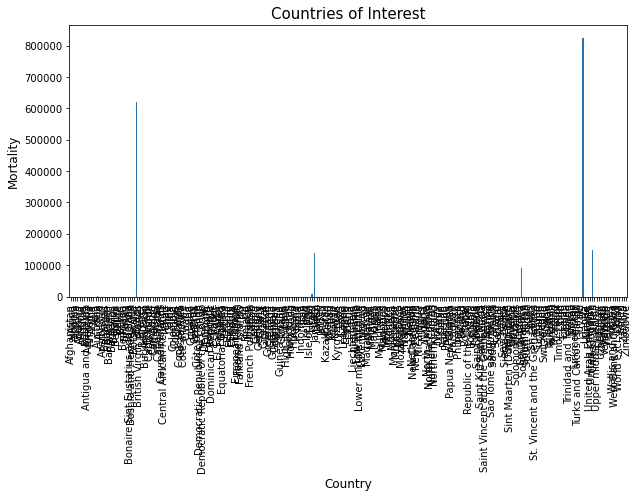

In [34]:
#   plot mortality for selected countries of interest using pandas             *** NEEDS FIXING   ****
#                                                                              *** SELECTING ALL COUNTRIES   ***   CHE?
mortality = final_countries_df.groupby(["Country/Region"]).max()["Deaths"]
Bar_Pandas = mortality.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mortality", fontsize=12)
plt.title("Countries of Interest", fontsize=15)


Country/Region
Australia           2248
Brazil            619334
Israel              8243
Italy             137402
New Zealand           51
South Africa       91145
US                825536
United Kingdom    149096
Name: Deaths, dtype: int64

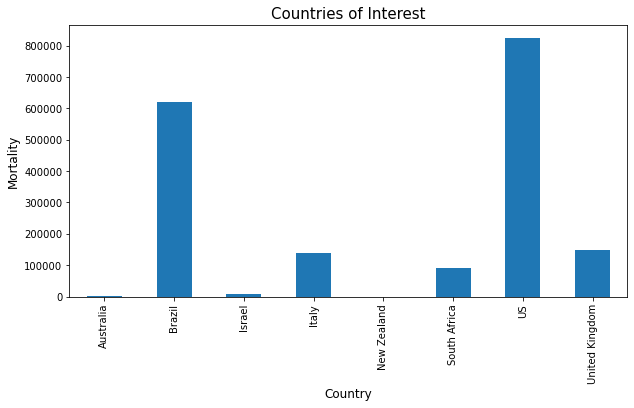

In [35]:
#   plot mortality for selected countries of interest using pandas (AS A STANDBY UNTIL ABOVE IS FIXED)
mortality = countries_df.groupby(["Country/Region"]).max()["Deaths"]
Bar_Pandas = mortality.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mortality", fontsize=12)
plt.title("Countries of Interest", fontsize=15)
mortality


In [36]:
#   check that "final_countries_df" properties are correct for a dataframe
final_countries_df
rowIndex = final_countries_df.index;
rowIndex

Int64Index([      0,       1,       2,       3,       4,       5,       6,
                  7,       8,       9,
            ...
            1595496, 1595497, 1595498, 1595499, 1595500, 1595501, 1595502,
            1595503, 1595504, 1595505],
           dtype='int64', length=1595506)

In [37]:
#   check that "final_countries_df" properties are correct for a dataframe
colIndex = final_countries_df.columns;
colIndex

Index(['Date_x', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'New cases', 'New deaths', 'New recovered', 'Case-Fatality',
       'Deaths-per-100k', 'Code', 'Date_y',
       'people_fully_vaccinated_per_hundred', '145609-annotations'],
      dtype='object')

Country/Region
Afghanistan           19.34
Africa                  NaN
Albania              112.54
Algeria               14.57
Andorra              181.48
                      ...  
World                   NaN
World excl. China       NaN
Yemen                  6.80
Zambia                20.88
Zimbabwe              34.12
Name: Deaths-per-100k, Length: 245, dtype: float64

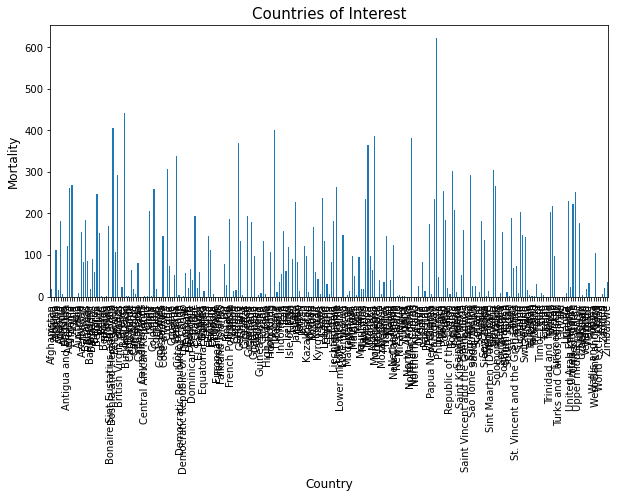

In [38]:
#   plot "deaths per 100,000 people" for selected countries of interest using pandas
#                                                                                      ***   SAME PROBLEM   ***
mortality = final_countries_df.groupby(["Country/Region"]).max()["Deaths-per-100k"]
Bar_Pandas = mortality.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mortality", fontsize=12)
plt.title("Countries of Interest", fontsize=15)
mortality


Text(0.5, 1.0, 'Countries of Interest')

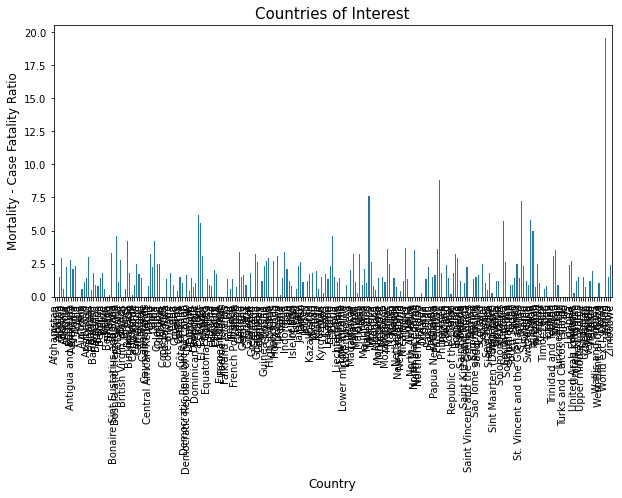

In [39]:
#    create "case / fatality ratio" bar chart for countries of interest                   *** SAME PROBLEM   ***
mortality = final_countries_df.groupby(["Country/Region"]).max()["Case-Fatality"]   
Bar_Pandas = mortality.plot.bar(figsize=(10,5), rot=90)
mortality
plt.xlabel("Country", fontsize=12)
plt.ylabel("Mortality - Case Fatality Ratio", fontsize=12)
plt.title("Countries of Interest", fontsize=15)


In [40]:
#   format the date in the weather_df dataset as "runDate" for graph titles   *** LEAVE AND TEST LATER   ****
#max_run_date = countries_df["Date"].max()
#runDate = datetime.utcfromtimestamp(max_run_date).strftime('%m-%d-%Y')

The r-square is nan
y = nanx + nan


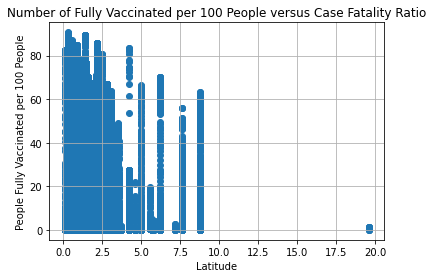

In [47]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Case Fatality Ratio"   ***   ISSUES   ***

#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = final_countries_df["Case-Fatality"]
y_values = final_countries_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = -40
#label the axes
x_label = "Case Fatality Ratio"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Case Fatality Ratio')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Case Fatality Ratio.png")
plt.show()  

The r-square is nan
y = nanx + nan


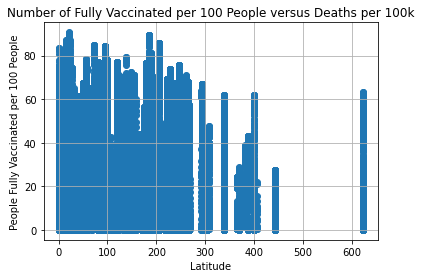

In [48]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Deaths per 100k People"   ***   ISSUES   ***


#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = final_countries_df["Deaths-per-100k"]
y_values = final_countries_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = -40
#label the axes
x_label = "Deaths per 100k"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Deaths per 100k')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths per 100k.png")
plt.show()  

The r-square is nan
y = nanx + nan


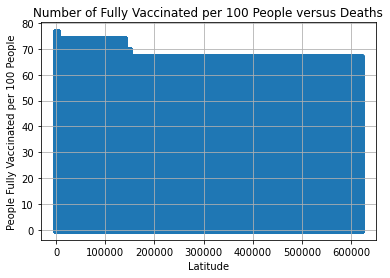

In [49]:
#   regression analysis: "Number of Fully Vaccinated per 100 People versus Deaths"   ***   ISSUES   ***


#   define the linear regression function
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equation appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

x_values = final_countries_df["Deaths"]
y_values = final_countries_df["people_fully_vaccinated_per_hundred"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = -40
#label the axes
x_label = "Deaths"
y_label = "People Fully Vaccinated per 100 People"
#give the title
plt.title(f'Number of Fully Vaccinated per 100 People versus Deaths')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png
plt.savefig("Percentage of People Fully Vaccinated versus Deaths.png")
plt.show()  